In [1]:
#Importando as bibliotecas que utilizarei nesse projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/time_series_covid_19_confirmed.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,736,750,766,773,782,789,795,803,820,832
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,743,743,745,745,747,748,750,751,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,27,27,30,35,35,35,36,36


In [3]:
#Renomeia as colunas
df.rename(columns={'Province/State':'estado','Country/Region':'pais'},inplace=True)
#Fundi as colunas com datas em uma linha e cria outra para o total
df_melt = pd.melt(df,id_vars=['estado','pais','Lat','Long'],var_name='data',value_name='total')
#Faz um teste
df_melt[(df_melt['pais'] == 'China') & (df_melt['estado'] == 'Zhejiang')].head()

,estado,pais,Lat,Long,data,total
81,Zhejiang,China,29.1832,120.0934,1/22/20,10
347,Zhejiang,China,29.1832,120.0934,1/23/20,27
613,Zhejiang,China,29.1832,120.0934,1/24/20,43
879,Zhejiang,China,29.1832,120.0934,1/25/20,62
1145,Zhejiang,China,29.1832,120.0934,1/26/20,104


In [4]:
#Cria uma data no formato datetime
df_melt['data2'] = pd.to_datetime(df_melt['data'])

In [5]:
#criando um dataframe sem todas aquelas informações de data repetidas

#Seleciona a data mostrando apenas UMA vez cada data
lista_data = df_melt['data2'].unique()

#Criando listas para armazenar os dados na mesma quantidade da lista com as datas
lista_total_china = []

#Criado um laço que para cada iteração do dia ele grave nas listas a soma dos valores
#daquele dia em todos os estados
for dia in range(len(lista_data)):
    lista_total_china.append(df_melt[(df_melt['data2'] == lista_data[dia]) & (df_melt['pais'] == 'China')]['total'].sum())
    
#Transfomo as listas em Series
data = pd.Series(lista_data)
total_china = pd.Series(lista_total_china)

#Crio um DataFrame a partir da data
df_china = data.to_frame(name='data')

#Cria as colunas com os dados no Dataframe
df_china['total'] = total_china
#df_china.head()

In [6]:
sns.set_style("darkgrid")

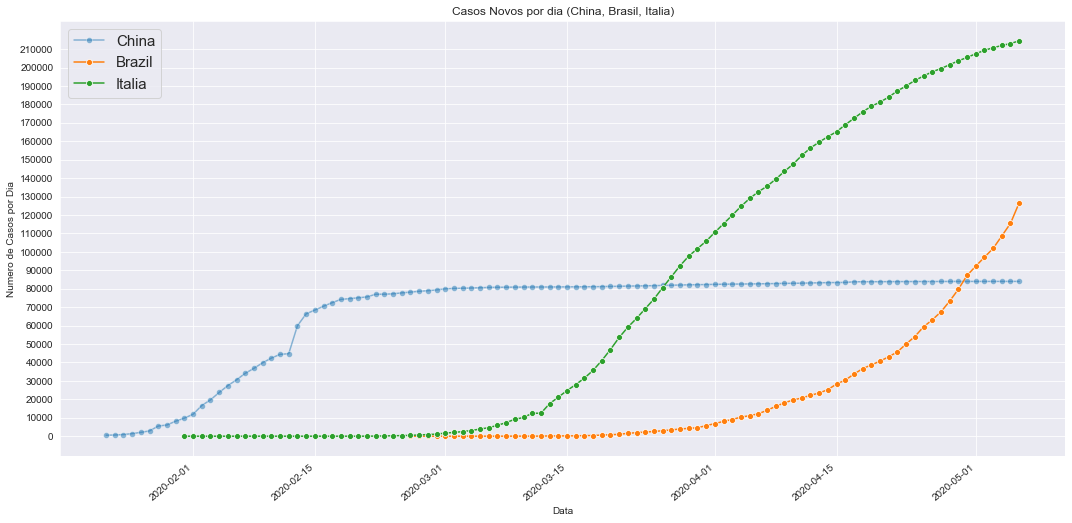

In [7]:
plt.figure(figsize=(18,8))

sns.lineplot(x='data',y='total',data=df_china,marker='o',label='China',alpha=0.5)
sns.lineplot(x=df_melt[(df_melt['pais'] == 'Brazil') & (df_melt['total'] >= 1)]['data2'],y=df_melt[(df_melt['pais'] == 'Brazil') & (df_melt['total'] >= 1)]['total'],
             marker='o',label='Brazil')
sns.lineplot(x=df_melt[(df_melt['pais'] == 'Italy') & (df_melt['total'] >= 1)]['data2'],y=df_melt[(df_melt['pais'] == 'Italy') & (df_melt['total'] >= 1)]['total'],
             marker='o',label='Italia')




plt.yticks(np.arange(0,df_melt[(df_melt['pais'] == 'Italy') & (df_melt['total'] >= 1)]['total'].max() + 5000,10000))
plt.xticks(rotation=40, horizontalalignment='right')
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

#Insere o título e a descrição de X e Y
plt.title('Casos Novos por dia (China, Brasil, Italia)')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

plt.legend()
plt.show()